# Clustering Heart Disease Patient Data 

---
References

---


[Dataset](https://www.kaggle.com/code/caesarmario/heart-disease-eda-prediction/notebook#2.-|-Importing-Libraries-%F0%9F%93%9A)

[Refered Notebook](https://www.kaggle.com/datasets/pratikshakya/heart-disease-details)

[Ref Notebook 2](https://www.kaggle.com/code/sujithmandala/heart-disease-analysis-clustering/notebook)

[Ref Notebook 2](https://www.kaggle.com/code/darkaster/clustering-heart-disease-patient-data/notebook)

[Ref](https://www.section.io/engineering-education/multiclass-text-classification-with-pyspark)
---


## **Setting up Spark Environment **


---


1. Install Java
1. Install Spark
1. Install findSpark 
1. Setting the env
1. Initialising findspark
1. Create Spark session


---


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## Mounting the google drive and Loading the file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Details of the data 

In [ ]:
sdf = spark.read.csv("drive/My Drive/bbc-project/classificationdata/heart.csv",header=True,inferSchema=True)
sdf.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

###  Column description


| Original Name   |  Description |
| :--  | :--- |
|**age**|age of patient
|**sex**|sex of patient:  0: female, 1: male
|**cp**|chest pain type: 0: typical angina, 1: atypical angina, 2: non-anginal, 3: asymptomatic |
|**trestbps**|resting blood pressure |
|**chol**|serum cholestoral in mg/dl |
|**fbs**|fasting blood sugar: 0: > 120 mg/dl, 1: < 120 mg/dl |
|**restecg**|resting electrocardiographic results: 0: normal, 1: ST-T wave abnormality, 2: ventricular hypertrophy |
|**thalach**|maximum heart rate achieved |
|**exang**|exercise induced angina:  0: no, 1: yes |
|**oldpeak**| ST depression induced by exercise relative to rest |
|**slope**|slope of the peak exercise ST segment:  0: upsloping, 1: flat, 2: downsloping |
|**ca**|number of major vessels (0-3) colored by flourosopy |
|**thal**| Thalium stress test:  0: normal 0, 1:normal 1, 2: fixed defect, 3: reversable defect |
|**target** | heart disease: 0: no disease, 1: disease|

Install autoviz

In [ ]:
!pip install -q autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.2 MB/s eta 0:00:00
     

In [ ]:
pdf = sdf.toPandas()
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(pdf)

Output hidden; open in https://colab.research.google.com to view.

We don't need target here as its a Clustering solution 

In [ ]:
pdf.drop('target', axis = 1, inplace = True)
pdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


Evaluation of outayers and removals

In [ ]:
import numpy as np
import pandas as pd
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)
detect_outliers(pdf)

,Outlier_percentage
fbs,14.851485
ca,8.250825
trestbps,2.970297
chol,1.650165
oldpeak,1.650165
thal,0.660066
thalach,0.330033
age,0.000000
sex,0.000000
cp,0.000000


In [ ]:
pdf.shape

(303, 13)

In [ ]:
pdf.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
pdf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from pycaret  import regression
from sklearn.model_selection import cross_val_score

<Axes: >

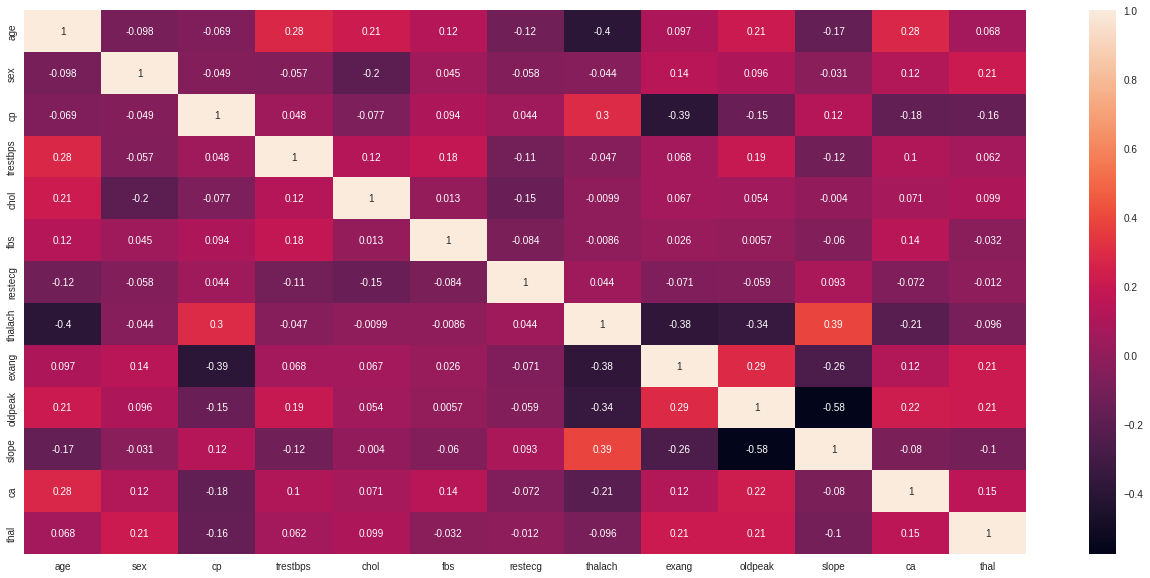

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(pdf.corr(),annot=True)


In [ ]:
from pycaret.clustering import *
from sklearn.datasets import make_blobs

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [ ]:
setup(pdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(303, 13)"
2,Transformed data shape,"(303, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.AffinityPropagation
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeClustering
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2806,177.5344,1.0617,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Elbow Graph

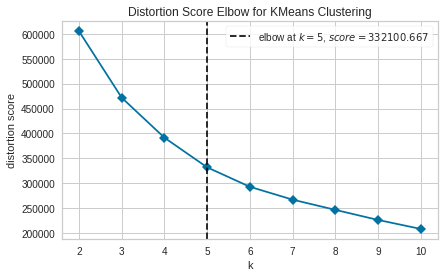

In [ ]:
plot_model(model, 'elbow')

In [ ]:
model = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2782,169.8111,1.0655,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
plot_model(model, 'cluster')

In [ ]:
save_model(model, 'clustering_model')
results = assign_model(model)
results.head(10)

Transformation Pipeline and Model Successfully Saved


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Cluster
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,Cluster 3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,Cluster 3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,Cluster 1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,Cluster 3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,Cluster 4
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,Cluster 1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,Cluster 4
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,Cluster 3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,Cluster 1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,Cluster 1


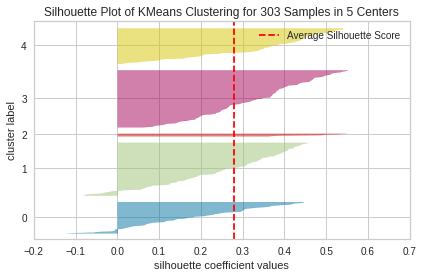

In [ ]:
plot_model(model, 'silhouette')

In [ ]:
plot_model(model, 'distribution')

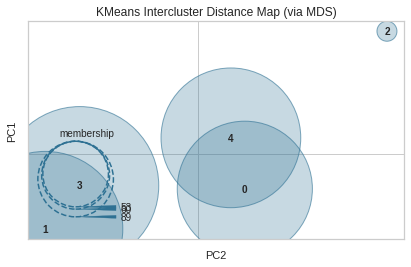

In [ ]:
plot_model(model, 'distance')

In [ ]:
plot_model(model, 'tsne')